# Домашнее задание 3

Как найти стог сена в иголке? Практический проект по построению системы поиска аномалий.

**Цель:**

В этом домашнем задании вам предстоит настроить систему по поиску аномалий в банковских транзакциях. Мало того, что аномальных значений в данных меньше одного процента, так еще и переменные анонимизированные и представляют собой первые 28 главных компонент, полученных после PCA преобразования оригинальных данных (о которых мы ничего не знаем).
Смогут ли бравые unsupervised методы справится с такой задачей? Можно ли работать в таких условиях? Кто подставил кролика Роджера? Ответы на некоторые их этих вопросов вы узнаете после выполнения задания :)

<hr>

Описание/Пошаговая инструкция выполнения домашнего задания:

**Часть 1. EDA и Preprocessing.**

1. Скачайте датасет с https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv
2. Проведите небольшой EDA (гистограммы и описательные статистики - обязательно).

**Часть 2. Поиск аномалий.**

1. Воспользуйтесь процентом аномалий, подсчитанным по переменной Class, как "экспертной оценкой" загрязненности нашего датасета. Попробуйте построить различные модели и алгоритмы, разобранные на занятии, используя полученную экспертную оценку для настройки параметров.
2. При помощи tSNE и/или UMAP, постройте сжатое представление исходных данных и проверьте, действительно ли аномалии лежат достаточно далеко от основной массы точек.

**Часть 3. Оценка методов по поиску аномалий.**

1. Воспользуйтесь стандартными методами оценки качества бинарной классификации (особенно хорошо подойдёт classification report и confusion matrix), и, используя предсказания моделей и переменную Class, проверьте, действительно ли модели справляются со своей задачей и на сколько хорошо они это делают.


<hr>

Критерии оценки:
Базовый EDA - 2 балла.
Построены различные алгоритмы по поиску аномалий (основанные на расстояниях, плотностях и используя модели) - 5 баллов.
Проверка качества и отображение на сжатое пространство - 3 балла.

# Часть 1. EDA и Preprocessing.

Скачаем исходный датасет.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

Аномальные данные составляют всего 0,17%! Будем использовать дальше эту пропорцию в качестве оценки для определения аномалий по расстоянию от центра.

Посмотрим на разницу в характеристиках обычных банковских транзакций и помеченных как аномальных.

In [4]:
# Обычные
round(df[df['Class'] == 0].describe().transpose(), 2)

,count,mean,std,min,25%,50%,75%,max
Time,284315.0,94838.20,47484.02,0.00,54230.00,84711.00,139333.00,172792.00
V1,284315.0,0.01,1.93,-56.41,-0.92,0.02,1.32,2.45
V2,284315.0,-0.01,1.64,-72.72,-0.60,0.06,0.80,18.90
V3,284315.0,0.01,1.46,-48.33,-0.88,0.18,1.03,9.38
V4,284315.0,-0.01,1.40,-5.68,-0.85,-0.02,0.74,16.88
V5,284315.0,0.01,1.36,-113.74,-0.69,-0.05,0.61,34.80
V6,284315.0,0.00,1.33,-26.16,-0.77,-0.27,0.40,73.30
V7,284315.0,0.01,1.18,-31.76,-0.55,0.04,0.57,120.59
V8,284315.0,-0.00,1.16,-73.22,-0.21,0.02,0.33,18.71
V9,284315.0,0.00,1.09,-6.29,-0.64,-0.05,0.60,15.59


In [5]:
# Аномальные
round(df[df['Class'] != 0].describe().transpose(), 2)

,count,mean,std,min,25%,50%,75%,max
Time,492.0,80746.81,47835.37,406.00,41241.50,75568.50,128483.00,170348.00
V1,492.0,-4.77,6.78,-30.55,-6.04,-2.34,-0.42,2.13
V2,492.0,3.62,4.29,-8.40,1.19,2.72,4.97,22.06
V3,492.0,-7.03,7.11,-31.10,-8.64,-5.08,-2.28,2.25
V4,492.0,4.54,2.87,-1.31,2.37,4.18,6.35,12.11
V5,492.0,-3.15,5.37,-22.11,-4.79,-1.52,0.21,11.10
V6,492.0,-1.40,1.86,-6.41,-2.50,-1.42,-0.41,6.47
V7,492.0,-5.57,7.21,-43.56,-7.97,-3.03,-0.95,5.80
V8,492.0,0.57,6.80,-41.04,-0.20,0.62,1.76,20.01
V9,492.0,-2.58,2.50,-13.43,-3.87,-2.21,-0.79,3.35


Вроде бы есть разницы в статистических характреристиках некоторых признаков, есть надежда что алгоритмы могут справиться с поиском аномалий :).

Проверим, есть ли пустые значения.

In [6]:
empty_columns = [column for column in df.columns if df[column].isnull().sum() > 0]
empty_columns

[]

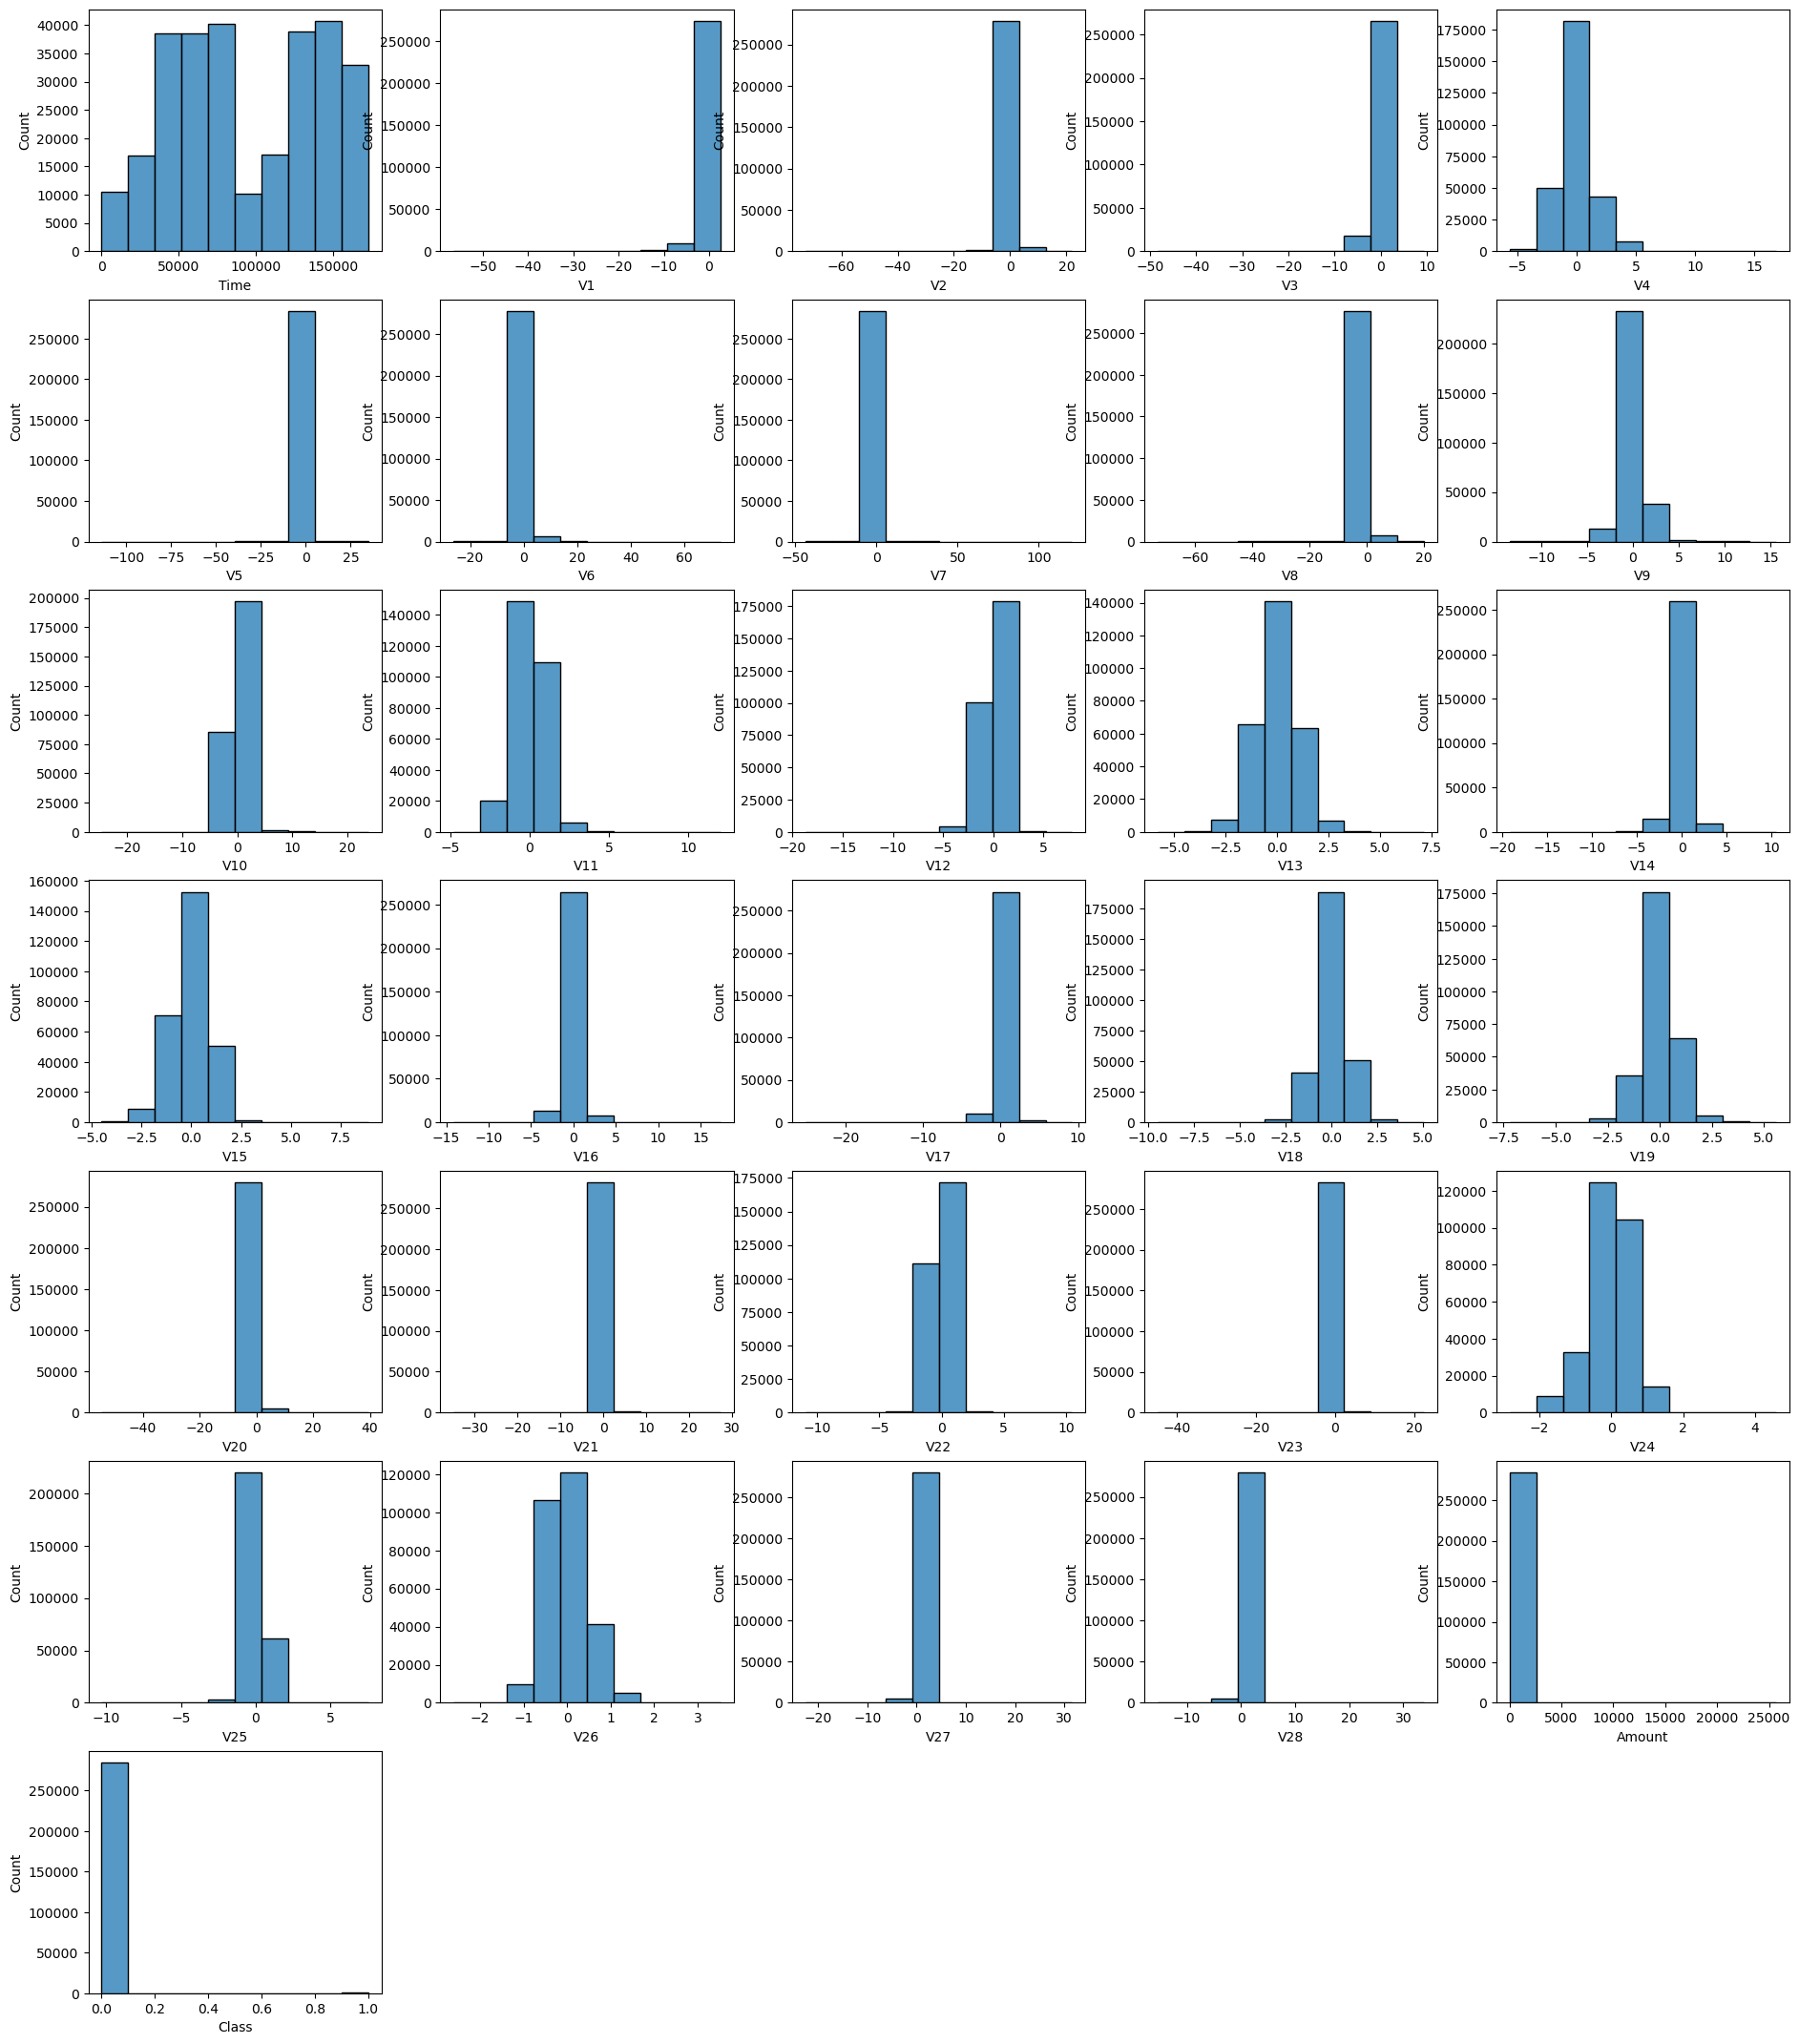

In [7]:
plt.figure(figsize=[23, 27])
plt.tight_layout()
for i, feature in enumerate(df.columns):
    plt.subplot(7,5,i+1)
    sns.histplot(x = df[feature], bins = 10)
plt.show()

Распределения признаков в большинстве случаем отличаются от нормальных.

Нормализуем данные и преобразуем их в двумерное пространство, чтобы посмотреть, как выделился ли отдельно класс аномальных транзакций.

In [8]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X = df.drop('Class', axis = 1)
df_scaled = scaler.fit_transform(X)

<AxesSubplot:>

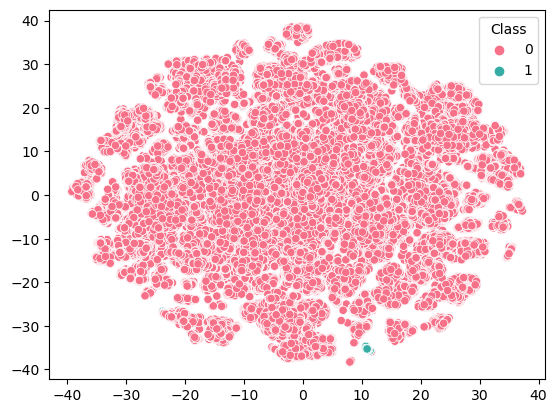

In [10]:
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

tsne = TSNE(perplexity=200, n_jobs=-1)
df_reduced = tsne.fit_transform(df_scaled)
sns.scatterplot(x = df_reduced[:,0],y = df_reduced[0:,1], palette = 'husl', hue = df['Class'])

Данные довольно объемные и не все алгоритмы могут с ними справиться с имеющейся у меня техничесими возможностями. Например, DBSCAN не сможет обрабатать все данные при высоких eps, поэтому для таких алгоритмов создадим репрезетационные выборки, которые будут являться отражением всего датасета и суммарные результаты обработки этих выборок будут являться апроксимацией обработки всего датасета.

**Подход с созданию выборок:**

1. Разбиваем весь датасет на обычные и аномальные транзакции
2. Перемешиваем каждую часть в случайном порядке
3. Разбиваем на 10 частей (примерно по 28 тыс строк в каждой выборке)
4. Объединяем каждую часть обычных и аномальных транзакций, сохраняя долю аномальных транзакций в каждой выборке равной основному датасету.
5. Нормализуем каждую выборку и собираем их все в два словаря

In [11]:
shuffled = df[df['Class'] == 0].sample(frac = 1)
temp0 = np.array_split(shuffled, 10) 
shuffled = df[df['Class'] != 0].sample(frac = 1)
temp1 = np.array_split(shuffled, 10) 

sample_ = {}
sample_scaled_ = {}

for j in range(0,10):
    sample_[j] = pd.concat([temp0[j], temp1[j]])
    temp = sample_[j].drop('Class', axis = 1)
    sample_scaled_[j] = scaler.fit_transform(temp)

# Часть 2. Поиск аномалий.

## 2.1 Поиск аномалий с помощью DBSCAN

DBSCAN при выделении кластеров часть данных помечает как аномальные. При этом алгоритм очень чувствителен к гиперпараметрам eps и min_sample. Воспользуемся подготовленными выборками (на эксперименты со целым датасетом не хватает памяти), чтобы посмотреть как изменение этих гипрепараметров влияет на точность определения аномалии. 

Буду использовать метрику F1 для оценки точности предсказания. Для финальной модели буду использовать те гиперпараметры, которые дадут максимальные значения метрики на большем кол-ве датасетов.


In [12]:
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, auc,
                             classification_report)

scores_tot = pd.DataFrame()
eps_range = [0.5, 3, 7, 10, 12, 15, 19, 25]

for j in range(0,10):
    scores = pd.DataFrame()
    for i in eps_range:
        dbscan = DBSCAN(eps = i).fit(sample_scaled_[j])
        labels = dbscan.labels_
        labels = [1 if label == -1 else 0 for label in labels]
        new_row = {'Test':f'Eps_{i}', 
                    f'F1_s{j}': round(f1_score(sample_[j]['Class'], labels)*100)
                  }
        scores = scores.append(new_row, ignore_index = True)
    scores = scores.set_index('Test')    
    scores_tot = pd.concat([scores, scores_tot], axis = 1)
    
scores_tot['mean'] = round(scores_tot.mean(axis=1))
scores_tot = scores_tot.sort_values(by = 'mean', ascending = False)
scores_tot = scores_tot.style.highlight_max(color = 'lightgreen', axis = 0)

display(scores_tot)

,F1_s9,F1_s8,F1_s7,F1_s6,F1_s5,F1_s4,F1_s3,F1_s2,F1_s1,F1_s0,mean
Test,,,,,,,,,,,
Eps_10,19,16,19,9,19,13,14,11,15,17,15.000000
Eps_12,20,17,16,12,23,15,17,11,13,10,15.000000
Eps_15,13,19,13,16,20,15,19,7,11,7,14.000000
Eps_7,12,15,14,10,13,10,11,11,11,12,12.000000
Eps_19,9,22,12,6,21,10,19,0,11,8,12.000000
Eps_25,5,17,13,0,21,0,9,0,2,7,7.000000
Eps_3,2,2,2,1,2,2,2,2,1,2,2.000000
Eps_0.5,0,0,0,0,0,0,0,0,0,0,0.000000


In [13]:
scores_tot = pd.DataFrame()
samples_range = np.arange(4, 13, 1)

for j in range(0,10):
    scores = pd.DataFrame()
    for i in samples_range:
        dbscan = DBSCAN(eps = 12, min_samples=i).fit(sample_scaled_[j])
        labels = dbscan.labels_
        labels = [1 if label == -1 else 0 for label in labels]
        new_row = {'Test':f'N_samp_{i}', 
                    f'F1_s{j}': round(f1_score(sample_[j]['Class'], labels)*100)
                  }
        scores = scores.append(new_row, ignore_index = True)
    scores = scores.set_index('Test')    
    scores_tot = pd.concat([scores, scores_tot], axis = 1)
    
scores_tot['mean'] = round(scores_tot.mean(axis=1))
display(scores_tot.sort_values(by = 'mean', ascending = False).style.highlight_max(color = 'lightgreen', axis = 0))

,F1_s9,F1_s8,F1_s7,F1_s6,F1_s5,F1_s4,F1_s3,F1_s2,F1_s1,F1_s0,mean
Test,,,,,,,,,,,
N_samp_7,19,20,15,13,22,14,15,11,13,15,16.000000
N_samp_8,20,19,16,12,21,14,15,11,14,17,16.000000
N_samp_9,19,19,15,12,21,14,15,11,13,17,16.000000
N_samp_12,20,21,15,13,21,13,15,10,13,16,16.000000
N_samp_5,20,17,16,12,23,15,17,11,13,10,15.000000
N_samp_6,19,16,15,13,22,14,15,11,12,10,15.000000
N_samp_10,19,18,15,12,21,13,15,11,13,17,15.000000
N_samp_11,20,18,15,13,20,13,15,11,13,16,15.000000
N_samp_4,17,17,17,8,20,15,17,9,14,9,14.000000


Получается, что лучшую метрику F1 дает eps = 10 или 12 и min_sample = 5. Воспользуемся этими гиперпараметрами для расчета меток для всего датасета.

Добавляю принт-скрины с форматированием, так как форматирование Styler исчезает при закрытии ноутбука.

**Подбор eps**
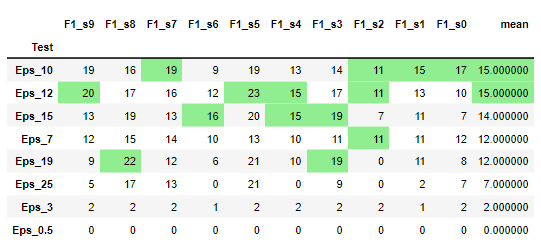

**Подбор min_sample**
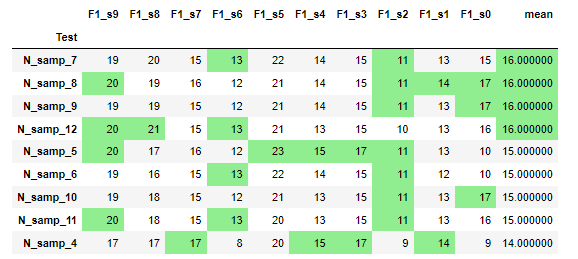

Будем определять метки по каждой выборке и затем добавим их в общий датасет. При таких параметрах объема памяти не хвататет для расчета меток для всего датасета целиком, поэтому будем считать что расчет для каждой отдельной выборки будет лучшей апроксимацией для всего датасета.

In [14]:
temp = pd.DataFrame()
for j in range(0,10):
    dbscan = DBSCAN(eps = 12, min_samples=5).fit(sample_scaled_[j])
    labels = dbscan.labels_
    labels = [1 if label == -1 else 0 for label in labels]
    sample_[j]['DBSCAN'] = labels
    temp = pd.concat([temp,sample_[j] ])
df = pd.merge(df, temp['DBSCAN'], how = 'left', left_index = True, right_index = True)

<AxesSubplot:>

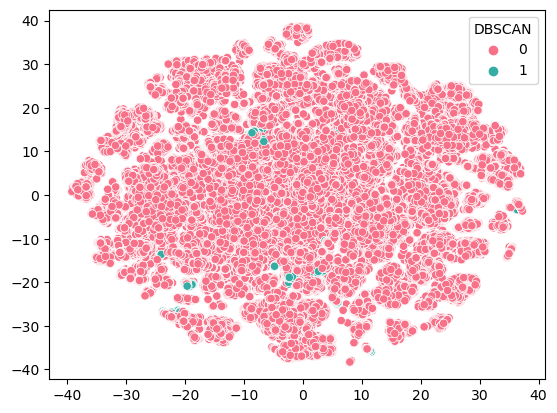

In [15]:
sns.scatterplot(x = df_reduced[:,0],y = df_reduced[0:,1], palette = 'husl', hue = df['DBSCAN'])

Да, уже визуально видно, что аномалий больше найдено, чем нужно и они разбросаны по всему датасету. Посмотрим на метрики точности в части 3.

## 2.2 Поиск аномалий с помощью OneClassSVM

Алгоритм OneClassSVM имеет один параметр для настройки nu. Посмотрим, как изменение этого параметра влияет на метрику F1 по всем выборкам. Выберем то значение, которое дает максимальные значения метрики для большего кол-ва выборок.

In [16]:
from sklearn.svm import OneClassSVM

scores_tot = pd.DataFrame()
nu_range = [0.004, 0.01, 0.04, 0.1, 0.5]

for j in range(0,10):
    scores = pd.DataFrame()
    for i in nu_range:
        one_class_svm = OneClassSVM(nu=i, gamma='auto')
        one_class_svm.fit(sample_scaled_[j])
        svm_outliers = one_class_svm.predict(sample_scaled_[j])
        labels= [1 if label == -1 else 0 for label in svm_outliers]
        new_row = {'Test':f'nu_{i}', 
                    f'F1_s{j}': round(f1_score(sample_[j]['Class'], labels)*100)
                  }
        scores = scores.append(new_row, ignore_index = True)
    scores = scores.set_index('Test')    
    scores_tot = pd.concat([scores, scores_tot], axis = 1)
    
scores_tot['mean'] = round(scores_tot.mean(axis=1))
display(scores_tot.sort_values(by = 'mean', ascending = False).style.highlight_max(color = 'lightgreen', axis = 0))

,F1_s9,F1_s8,F1_s7,F1_s6,F1_s5,F1_s4,F1_s3,F1_s2,F1_s1,F1_s0,mean
Test,,,,,,,,,,,
nu_0.04,6,8,7,6,7,7,6,7,6,8,7.000000
nu_0.004,4,5,6,6,7,5,6,4,7,3,5.000000
nu_0.01,6,6,5,5,5,5,4,5,5,5,5.000000
nu_0.1,3,3,3,3,3,3,3,3,3,3,3.000000
nu_0.5,1,1,1,1,1,1,1,1,1,1,1.000000


Получается, что лучшим параметром является nu = 0.04. Воспользуемся им для расчета меток для всего датасета.

Прикладываю принт-скрин, так как Styler не сохраняет фрматирвоание после закрытия ноутбука
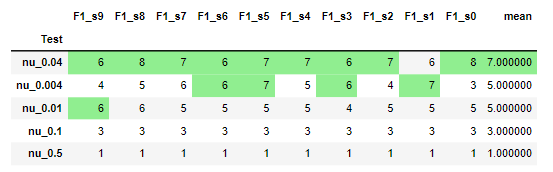

In [17]:
one_class_svm = OneClassSVM(nu=0.04, gamma='auto')
one_class_svm.fit(df_scaled)
svm_outliers = one_class_svm.predict(df_scaled)
labels= [1 if label == -1 else 0 for label in svm_outliers]
df['SVM_One'] = labels

<AxesSubplot:>

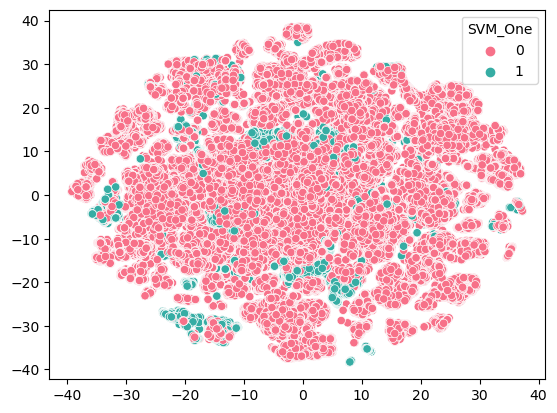

In [18]:
sns.scatterplot(x = df_reduced[:,0],y = df_reduced[0:,1], palette = 'husl', hue = df['SVM_One'])

Визуально ситуация очень похожа на DBSCAN, слишком много данных отмечено как аномалии :(


# 2.3 Поиск аномалий с помощью IsolationForest

Поступим также как и в предыдущих случаях, посмотрим как влияют гиперпараметры на метку F1. Смотреть будем влияние параметров **n_estimators** и **max_features** на всех выборках и возьмем те параметры, которые дали максимальные величины для большинства выборок.


In [19]:
from sklearn.ensemble import IsolationForest

scores_tot = pd.DataFrame()
estimators_range = [100, 200,800, 1200]
max_features_range = [7, 20, 30]

for j in range(0,10):
    scores = pd.DataFrame()
    for i in estimators_range:
        for k in max_features_range:
            isolation_forest = IsolationForest(n_estimators=i,  
                                               max_features=k, 
                                               bootstrap=True

                                              )
            isolation_forest.fit(sample_scaled_[j])

            isolation_outliers = isolation_forest.predict(sample_scaled_[j])
            isolation_outliers = [1 if label == -1 else 0 for label in isolation_outliers]
            new_row = {'Test':f'est_{i}_feat_{k}', 
                        f'F1_s{j}': round(f1_score(sample_[j]['Class'], isolation_outliers)*100)
                      }
            scores = scores.append(new_row, ignore_index = True)
    scores = scores.set_index('Test')    
    scores_tot = pd.concat([scores, scores_tot], axis = 1)
    
scores_tot['mean'] = round(scores_tot.mean(axis=1))
display(scores_tot.sort_values(by = 'mean', ascending = False).style.highlight_max(color = 'lightgreen', axis = 0))

,F1_s9,F1_s8,F1_s7,F1_s6,F1_s5,F1_s4,F1_s3,F1_s2,F1_s1,F1_s0,mean
Test,,,,,,,,,,,
est_200_feat_30,7,9,8,7,8,7,7,7,8,8,8.000000
est_800_feat_20,7,8,8,7,8,7,7,7,8,8,8.000000
est_800_feat_30,7,8,8,7,8,7,7,8,7,8,8.000000
est_1200_feat_20,7,8,8,7,8,7,7,8,8,8,8.000000
est_1200_feat_30,7,8,9,7,8,7,7,7,7,8,8.000000
est_100_feat_7,7,8,7,6,6,7,6,7,7,8,7.000000
est_100_feat_20,6,8,9,6,9,7,7,7,7,8,7.000000
est_100_feat_30,6,9,8,6,8,8,6,7,7,7,7.000000
est_200_feat_7,6,8,8,6,8,7,7,6,6,8,7.000000


Лучше всего F1 при параметрах n_estimators = 1200 и max_features = 20. C этими параметрами расчитаем лейблы для всего датасета.

Принт-скрин для сохранения форматирования
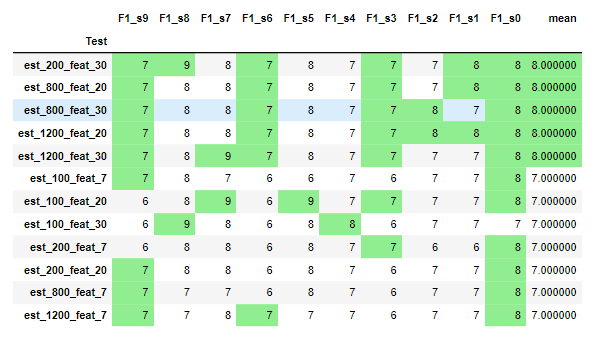

In [20]:
isolation_forest = IsolationForest(n_estimators=1200,  
                                   max_features=20, 
                                   bootstrap=True
                                  )

isolation_forest.fit(df_scaled)

isolation_outliers = isolation_forest.predict(df_scaled)
isolation_outliers = [1 if label == -1 else 0 for label in isolation_outliers]
df['Forest'] = isolation_outliers

<AxesSubplot:>

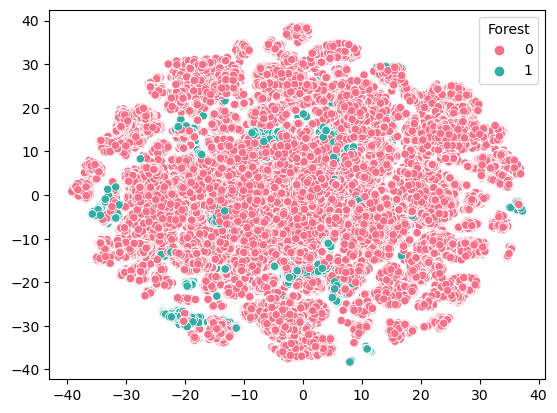

In [21]:
sns.scatterplot(x = df_reduced[:,0],y = df_reduced[0:,1], palette = 'husl', hue = df['Forest'])

Визуально опять слишком много определено аномалий, посмотрим на метрику в части 3.


# 2.4 Поиск аномалий с помощью KMeans

Основная идея заключается в том, что все данные объединяются в 1 класс. С помощью алгоритма KMeans ищем центроиды каждого признака. В рамках каждого признака для каждой точки рассчитывается евклидово расстояние до центроида.

В качестве аномалий помечаются точки, выходящие за рамки 99-го персентиля. Данный персентиль берем из исходных данных как профессиональное суждение или исторические данные.

In [22]:
from sklearn.cluster import KMeans
from numpy import sqrt

model = KMeans(n_clusters = 1, random_state=42)
model.fit(df_scaled)

centers = pd.DataFrame(model.cluster_centers_)
data =pd.DataFrame(df_scaled)

distance = pd.DataFrame()

for column in range(data.shape[1]):
    distance[column] = (data[column]-centers[column].loc[0])**2

distance['dist'] = sqrt(distance.sum(axis = 1))

dist = [1 if dist > np.percentile(distance['dist'], 99) else 0 for dist in distance['dist'].values]
df['KMeans'] = dist

<AxesSubplot:>

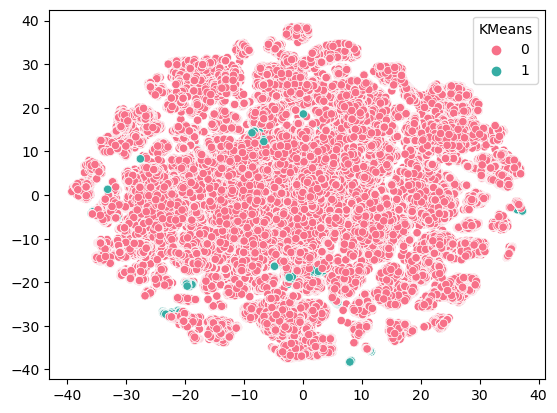

In [23]:
sns.scatterplot(x = df_reduced[:,0],y = df_reduced[0:,1], palette = 'husl', hue = df['KMeans'])

Визуально аномалий обнаружено меньше, но кажется не совсем там где должны быть :(

# Часть 3. Оценка методов по поиску аномалий.

Для каждого алгоритма сравним confusion matrix и основные метрики для классификации

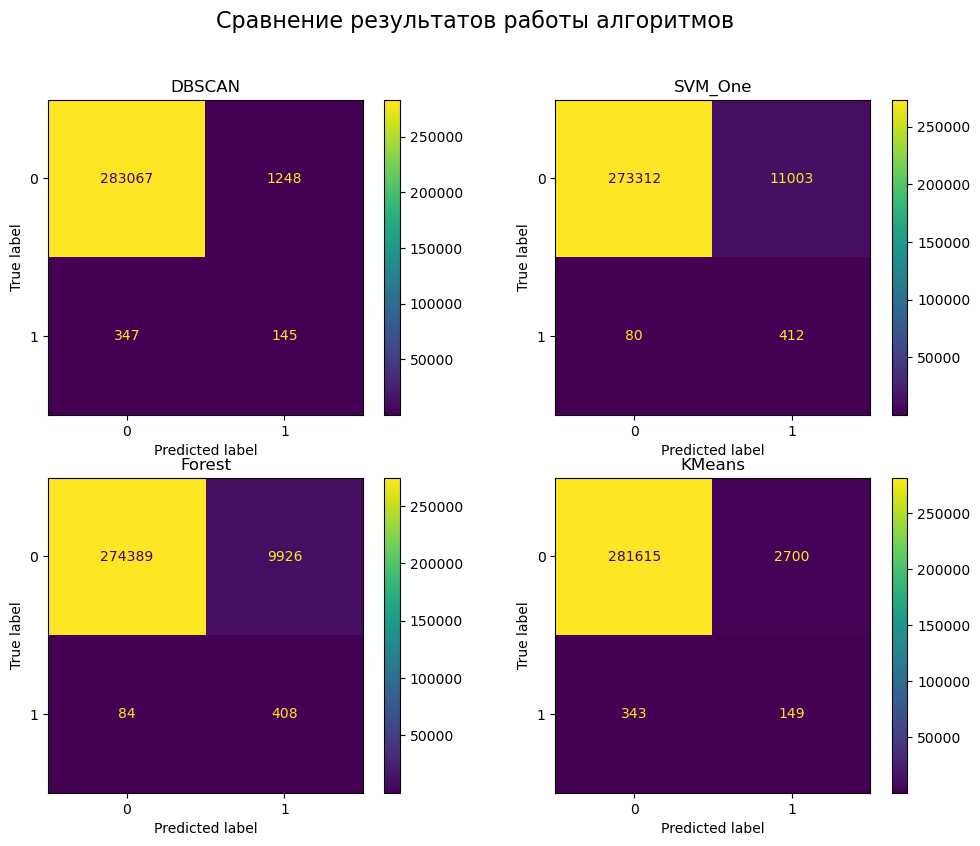

In [25]:
from sklearn import metrics

labels = ['DBSCAN', 'SVM_One', 'Forest', 'KMeans']
fig, axes = plt.subplots (nrows = 2, ncols = 2, figsize=(12, 9))

#plt.tight_layout()
for i, label in enumerate(labels):
    metrics.ConfusionMatrixDisplay.from_predictions(df['Class'], df[label], ax = axes[i//2,i%2])
    axes[i//2,i%2].set_title(label)
plt.suptitle('Сравнение результатов работы алгоритмов', fontsize = 16)
plt.show()

In [26]:
scores = pd.DataFrame()

for label in labels:

    new_row = {'Model':label, 'Accuracy':round(accuracy_score(df['Class'], df[label]),4),
               'Precision':round(precision_score(df['Class'], df[label]),4),
               'Recall': round(recall_score(df['Class'], df[label]),4),
               'F1 score': round(f1_score(df['Class'], df[label]),4),
               'ROC-AUC': round(roc_auc_score(df['Class'], df[label]),4)
              }
    scores = scores.append(new_row, ignore_index=True)
scores = scores.set_index('Model')
scores

,Accuracy,Precision,Recall,F1 score,ROC-AUC
Model,,,,,
DBSCAN,0.9944,0.1041,0.2947,0.1538,0.6452
SVM_One,0.9611,0.0361,0.8374,0.0692,0.8993
Forest,0.9649,0.0395,0.8293,0.0754,0.8972
KMeans,0.9893,0.0523,0.3028,0.0892,0.6467


# Выводы:

Ни один из алгоритмов не сработал достаточно хорошо. Все ошибались в основном с излишним предсказанием аномалий там, где их нет. Сложно выбрать какой-то из них, я бы наверное не стала пользоваться ими для предсказания мошеннических схем.